In [1]:
import jupyros as jr
import rospy
import numpy as np
from sensor_msgs import msg
import cv2
import cv_bridge
from copy import deepcopy
import ipywidgets as widgets
import PIL.Image
from cStringIO import StringIO
import matplotlib.pyplot as plt
import dvrk
import PyKDL
import tf
import time
from tf_conversions import posemath
import utils

In [2]:
rospy.init_node('notebook')
rospy.get_published_topics()

[['/dvrk/setup_joint/robot_state', 'std_msgs/String'],
 ['/dvrk/PSM1/current_state', 'std_msgs/String'],
 ['/dvrk/ECM/wrench_body_current', 'geometry_msgs/WrenchStamped'],
 ['/dvrk/PSM3/goal_reached', 'std_msgs/Bool'],
 ['/dvrk/PSM2/position_cartesian_local_current', 'geometry_msgs/PoseStamped'],
 ['/dvrk/console/teleop/scale', 'std_msgs/Float32'],
 ['/dvrk/PSM3/state_joint_current', 'sensor_msgs/JointState'],
 ['/dvrk/console/teleop/teleop_psm_selected', 'diagnostic_msgs/KeyValue'],
 ['/dvrk/PSM2/joint_velocity_ratio', 'std_msgs/Float64'],
 ['/dvrk/ECM/warning', 'std_msgs/String'],
 ['/dvrk/PSM3/manip_clutch', 'std_msgs/Bool'],
 ['/dvrk/PSM3/position_cartesian_current', 'geometry_msgs/PoseStamped'],
 ['/dvrk/ECM/state_joint_desired', 'sensor_msgs/JointState'],
 ['/dvrk/console/teleop/teleop_psm_unselected', 'diagnostic_msgs/KeyValue'],
 ['/dvrk/PSM2/position_cartesian_desired', 'geometry_msgs/PoseStamped'],
 ['/dvrk/ECM/position_cartesian_local_current', 'geometry_msgs/PoseStamped'],


In [68]:
bridge = cv_bridge.CvBridge()
left_image = None
left_image_msg = None
left_camera_info = None

right_image = None
right_image_msg = None
right_camera_info = None

def left_image_callback(im_msg):
    global left_image, left_image_msg
    left_image = bridge.imgmsg_to_cv2(im_msg, desired_encoding='rgb8')
    left_image_msg = im_msg
    
def right_image_callback(im_msg):
    global right_image, right_image_msg
    right_image = bridge.imgmsg_to_cv2(im_msg, desired_encoding='rgb8')
    right_image_msg = im_msg
    
def left_camera_info_callback(camera_info_msg):
    global left_camera_info
    left_camera_info = camera_info_msg
    
def right_camera_info_callback(camera_info_msg):
    global right_camera_info
    right_camera_info = camera_info_msg
    
jr.subscribe('/stereo/left/image_raw', msg.Image, left_image_callback)
jr.subscribe('/stereo/left/camera_info', msg.CameraInfo, left_camera_info_callback)
jr.subscribe('/stereo/right/image_raw', msg.Image, right_image_callback)
jr.subscribe('/stereo/right/camera_info', msg.CameraInfo, right_camera_info_callback)

while left_image is None or right_image is None:
    time.sleep(0.5)

Removing previous callback, only one redirection possible right now
Removing previous callback, only one redirection possible right now
Removing previous callback, only one redirection possible right now
Removing previous callback, only one redirection possible right now


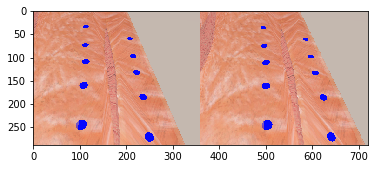

In [69]:
plt.imshow(np.hstack((left_image, right_image)))

In [70]:
tf_listener = tf.TransformListener()
time.sleep(1)
tf_listener.getFrameStrings()

['PSM2_tool_wrist_shaft_link',
 'PSM2_outer_pitch_front_link',
 'PSM2_tool_main_link',
 'PSM2_tool_wrist_caudier_link_2_left',
 'PSM1',
 'PSM2',
 'PSM3',
 'PSM2_tool_wrist_caudier_ee_link',
 'PSM1_tool_wrist_sca_ee_link_1',
 'PSM1_tool_wrist_sca_ee_link_2',
 'ecm_setup_link',
 'ecm_yaw_link',
 'PSM2_tool_wrist_caudier_link_shaft',
 'PSM1_tool_wrist_sca_ee_link_0',
 'ECM',
 'PSM1_outer_pitch_link',
 'PSM2_outer_pitch_link',
 'PSM1_tool_tip_link',
 'camera',
 'PSM1_outer_pitch_front_link',
 'ecm_pitch_link',
 'PSM1_outer_pitch_top_link',
 'PSM2_tool_wrist_caudier_link',
 'PSM1_outer_yaw_link',
 'ecm_roll_link',
 'ecm_pitch_link_2',
 'ecm_pitch_link_3',
 'PSM1_tool_wrist_shaft_link',
 'PSM2_outer_pitch_back_link',
 'PSM1_tool_wrist_sca_link',
 'PSM2_outer_pitch_top_link',
 'simcamera',
 'PSM2_tool_wrist_caudier_ee_link_0',
 'PSM1_outer_insertion_link',
 'PSM2_outer_pitch_bottom_link',
 'ecm_insertion_link',
 'PSM1_outer_pitch_bottom_link',
 'PSM2_tool_wrist_caudier_link_2_right',
 'ecm_ba

In [71]:
psm1 = dvrk.psm('PSM1')
ecm = dvrk.ecm('ECM')
while ecm.get_current_position() == PyKDL.Frame() or ecm.get_desired_position() == PyKDL.Frame():
    time.sleep(0.5)

In [72]:
ECM_STARTING_JOINT_POS = np.asarray([-0.15669435,  0.17855662,  0.07069676,  0.17411496])
ecm.move_joint(ECM_STARTING_JOINT_POS)

True

In [73]:
PSM_HOME_POS = np.asarray([0., 0., 0.05, 0., 0., 0.])
psm1.move_joint(PSM_HOME_POS)

True

[-0.01112903 -0.02032258  0.05031619]
[   -0.011129,  -0.0203226,   0.0503162]
[ 0.00974359 -0.01282051  0.03999492]
[  0.00974359,  -0.0128205,   0.0399949]
[-0.01037037 -0.00759259  0.05777044]
[  -0.0103704, -0.00759259,   0.0577704]
[ 0.01125    -0.00234375  0.0487438 ]
[     0.01125, -0.00234375,   0.0487438]
[-0.00875     0.00270833  0.06499174]
[    -0.00875,  0.00270833,   0.0649917]
[0.01240741 0.00666667 0.05777044]
[   0.0124074,  0.00666667,   0.0577704]
[-0.00833333  0.01142857  0.07427627]
[ -0.00833333,   0.0114286,   0.0742763]
[0.01416667 0.01479167 0.06499174]
[   0.0141667,   0.0147917,   0.0649917]
[-0.00710526  0.02263158  0.08209483]
[ -0.00710526,   0.0226316,   0.0820948]
[0.01595238 0.02642857 0.07427627]
[   0.0159524,   0.0264286,   0.0742763]


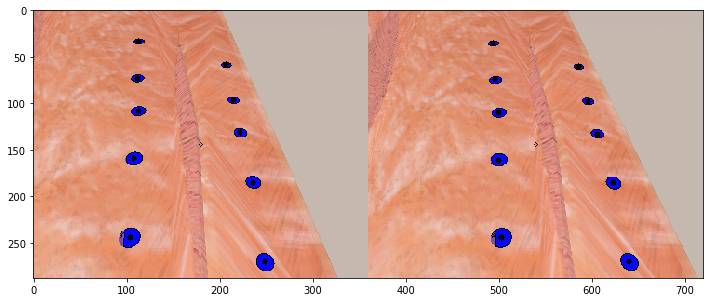

In [74]:
import image_geometry
utils = None
import utils
stereo_model = image_geometry.StereoCameraModel()
stereo_model.fromCameraInfo(left_camera_info, right_camera_info)

tf_cam_to_world = utils.tf_to_pykdl_frame(tf_listener.lookupTransform('simworld', 'simcamera', rospy.Time()))
tf_world_to_psm1 = \
    utils.PSM_J1_TO_BASE_LINK_TF * utils.tf_to_pykdl_frame(tf_listener.lookupTransform('J1_PSM1', 'simworld', rospy.Time()))

objects, frame = utils.get_points_and_img(left_image_msg, right_image_msg, stereo_model, tf_cam_to_world)
plt.figure(figsize=(12, 5))
plt.imshow(frame)

In [75]:
objects

[[    -1.52102,  -0.0278882,    0.692123],
 [    -1.51709, -0.00705657,    0.704331],
 [     -1.5068,  -0.0306291,    0.695033],
 [    -1.50349, -0.00892805,    0.704758],
 [    -1.49429,  -0.0320857,    0.696479],
 [    -1.49086,   -0.010942,    0.704008],
 [    -1.48189,  -0.0348153,    0.695361],
 [    -1.47989,  -0.0118991,       0.704],
 [    -1.46843,  -0.0369109,    0.696971],
 [    -1.46504,  -0.0137908,    0.704794]]

In [76]:
# pair up points that are across from each other
# x is *more or less* the axis along the wound
paired_pts = []
for pt in objects:
    objects.remove(pt)
    pt2 = min(objects, key=lambda obj : abs(obj.x() - pt.x()))
    objects.remove(pt2)
    paired_pts.append(
        (max(pt, pt2, key=lambda p: p.y()), min(pt, pt2, key=lambda p: p.y())))
paired_pts

[([    -1.51709, -0.00705657,    0.704331],
  [    -1.52102,  -0.0278882,    0.692123]),
 ([    -1.50349, -0.00892805,    0.704758],
  [     -1.5068,  -0.0306291,    0.695033]),
 ([    -1.47989,  -0.0118991,       0.704],
  [    -1.48189,  -0.0348153,    0.695361]),
 ([    -1.46504,  -0.0137908,    0.704794],
  [    -1.46843,  -0.0369109,    0.696971])]

In [82]:
PSM_HOME_POS = np.asarray([0., 0., 0.05, 0., 0., 0.])
psm1.move_joint(PSM_HOME_POS)

True

In [83]:
# calculate a desired pose
# this is really pushing my first year linear algebra skills
# we want the insertion to go from the min y point to the max y point
import math


# the desired rotation is calculated by setting the entry-to-exit vector of the suture as the x-axis vector,
# setting x-axis cross (0, 0, 1) as the z-axis vector, and setting the y-axis vector to the x-axis cross z-axis.
def calculate_desired_entry_pose(entry_and_exit_point):
    entry_to_exit_vector = entry_and_exit_point[1] - entry_and_exit_point[0]
    entry_to_exit_vector.Normalize()
    desired_z_vector = - entry_to_exit_vector * PyKDL.Vector(0, 0, 1)
    desired_y_vector = entry_to_exit_vector
    desired_x_vector = - desired_z_vector * desired_y_vector
    
    desired_rotation = \
        PyKDL.Rotation(desired_x_vector, desired_y_vector, desired_z_vector)
    desired_rotation.DoRotZ(0.2)
    
    desired_position = entry_and_exit_point[0] + (desired_x_vector * 0.002) + (desired_z_vector * -0.007)
    return PyKDL.Frame(desired_rotation, desired_position)
   
desired_pose = calculate_desired_entry_pose(paired_pts[0])
psm1.move(tf_world_to_psm1 * desired_pose)

[ERROR] [1599015764.170602]: bad callback: <bound method ecm.__state_joint_current_cb of <dvrk.ecm.ecm object at 0x7efc1b3ded10>>
Traceback (most recent call last):
  File "/opt/ros/melodic/lib/python2.7/dist-packages/rospy/topics.py", line 750, in _invoke_callback
    cb(msg)
  File "/home/ubuntu/catkin_ws/src/dvrk-ros/dvrk_python/src/dvrk/arm.py", line 285, in __state_joint_current_cb
    self.__velocity_joint_current.resize(len(data.velocity))
ValueError: cannot resize an array that references or is referenced
by another array in this way.
Use the np.resize function or refcheck=False



True

In [84]:
def calculate_insertion_pose(entry_and_exit_points, entry_pose, circular_progress_radians):
    # this sets the desired rotation and translation to a pose around the circle with diameter 
    # consisting of entry_and_exit_points and rotation CW about the z-axis of entry_pose such that the
    # x-axis is tangent to the circle
    new_orientation = deepcopy(entry_pose.M)
    new_orientation.DoRotZ(circular_progress_radians)
    
    circle_center = PyKDL.Vector(*np.mean(entry_and_exit_points))
    circle_radius = (circle_center - entry_and_exit_points[0]).Norm() - 0.003
    print("circle_center={}, circle_radius={}".format(circle_center, circle_radius))
    desired_angle_radial_vector = new_orientation * PyKDL.Vector(0, - circle_radius, 0)
    new_position = desired_angle_radial_vector + circle_center \
                    + (new_orientation.UnitX() * 0.002) + (new_orientation.UnitZ() * -0.007)
    
    return PyKDL.Frame(new_orientation, new_position)

desired_insertion_pose = calculate_insertion_pose(paired_pts[0], desired_pose, 0.2)
psm1.move(tf_world_to_psm1 * desired_insertion_pose)
desired_insertion_pose = calculate_insertion_pose(paired_pts[0], desired_pose, 0.4)
psm1.move(tf_world_to_psm1 * desired_insertion_pose)
desired_insertion_pose = calculate_insertion_pose(paired_pts[0], desired_pose, 0.6)
psm1.move(tf_world_to_psm1 * desired_insertion_pose)
desired_insertion_pose = calculate_insertion_pose(paired_pts[0], desired_pose, 1.0)
psm1.move(tf_world_to_psm1 * desired_insertion_pose)
desired_insertion_pose = calculate_insertion_pose(paired_pts[0], desired_pose, 1.2)
psm1.move(tf_world_to_psm1 * desired_insertion_pose)
desired_insertion_pose = calculate_insertion_pose(paired_pts[0], desired_pose, 1.4)
psm1.move(tf_world_to_psm1 * desired_insertion_pose)
desired_insertion_pose = calculate_insertion_pose(paired_pts[0], desired_pose, 1.6)
psm1.move(tf_world_to_psm1 * desired_insertion_pose)
desired_insertion_pose = calculate_insertion_pose(paired_pts[0], desired_pose, 1.6)
psm1.move(tf_world_to_psm1 * desired_insertion_pose)
desired_insertion_pose = calculate_insertion_pose(paired_pts[0], desired_pose, 1.8)
psm1.move(tf_world_to_psm1 * desired_insertion_pose)
desired_insertion_pose = calculate_insertion_pose(paired_pts[0], desired_pose, 2.0)
psm1.move(tf_world_to_psm1 * desired_insertion_pose)
desired_insertion_pose = calculate_insertion_pose(paired_pts[0], desired_pose, 2.2)
psm1.move(tf_world_to_psm1 * desired_insertion_pose)
desired_insertion_pose = calculate_insertion_pose(paired_pts[0], desired_pose, 2.4)
psm1.move(tf_world_to_psm1 * desired_insertion_pose)
desired_insertion_pose = calculate_insertion_pose(paired_pts[0], desired_pose, 2.6)
psm1.move(tf_world_to_psm1 * desired_insertion_pose)
desired_insertion_pose = calculate_insertion_pose(paired_pts[0], desired_pose, 2.8)
psm1.move(tf_world_to_psm1 * desired_insertion_pose)
desired_insertion_pose = calculate_insertion_pose(paired_pts[0], desired_pose, 3.0)
psm1.move(tf_world_to_psm1 * desired_insertion_pose)
desired_insertion_pose = calculate_insertion_pose(paired_pts[0], desired_pose, np.pi)
psm1.move(tf_world_to_psm1 * desired_insertion_pose)

circle_center=[    -1.51905,  -0.0174724,    0.698227], circle_radius=0.00923188518104
circle_center=[    -1.51905,  -0.0174724,    0.698227], circle_radius=0.00923188518104
circle_center=[    -1.51905,  -0.0174724,    0.698227], circle_radius=0.00923188518104
circle_center=[    -1.51905,  -0.0174724,    0.698227], circle_radius=0.00923188518104
circle_center=[    -1.51905,  -0.0174724,    0.698227], circle_radius=0.00923188518104
circle_center=[    -1.51905,  -0.0174724,    0.698227], circle_radius=0.00923188518104
circle_center=[    -1.51905,  -0.0174724,    0.698227], circle_radius=0.00923188518104
circle_center=[    -1.51905,  -0.0174724,    0.698227], circle_radius=0.00923188518104
circle_center=[    -1.51905,  -0.0174724,    0.698227], circle_radius=0.00923188518104
circle_center=[    -1.51905,  -0.0174724,    0.698227], circle_radius=0.00923188518104
circle_center=[    -1.51905,  -0.0174724,    0.698227], circle_radius=0.00923188518104
circle_center=[    -1.51905,  -0.0174724,  

True

[ERROR] [1599015839.793056]: bad callback: <bound method ecm.__state_joint_current_cb of <dvrk.ecm.ecm object at 0x7efc1b3ded10>>
Traceback (most recent call last):
  File "/opt/ros/melodic/lib/python2.7/dist-packages/rospy/topics.py", line 750, in _invoke_callback
    cb(msg)
  File "/home/ubuntu/catkin_ws/src/dvrk-ros/dvrk_python/src/dvrk/arm.py", line 286, in __state_joint_current_cb
    self.__effort_joint_current.resize(len(data.effort))
ValueError: cannot resize an array that references or is referenced
by another array in this way.
Use the np.resize function or refcheck=False

[ERROR] [1599015951.063157]: bad callback: <bound method ecm.__state_joint_current_cb of <dvrk.ecm.ecm object at 0x7efc900e7d50>>
Traceback (most recent call last):
  File "/opt/ros/melodic/lib/python2.7/dist-packages/rospy/topics.py", line 750, in _invoke_callback
    cb(msg)
  File "/home/ubuntu/catkin_ws/src/dvrk-ros/dvrk_python/src/dvrk/arm.py", line 285, in __state_joint_current_cb
    self.__velocity

In [41]:
def calculate_desired_extraction_pose(insertion_pose):
    new_rotation = deepcopy(insertion_pose.M)
    new_rotation.DoRotZ(np.pi - 0.25)
    return PyKDL.Frame(new_rotation, insertion_pose.p + insertion_pose.M * PyKDL.Vector(-0.006, -0.0205, 0.0005))

desired_extraction_pose = calculate_desired_extraction_pose(desired_insertion_pose)
psm1.open_jaw()
psm1.dmove(PyKDL.Vector(0, 0, 0.02))
psm1.move(tf_world_to_psm1 * desired_extraction_pose)
psm1.close_jaw()

True

In [42]:
psm1.move(tf_world_to_psm1 * desired_extraction_pose)

True

In [43]:
def calculate_desired_completion_pose(extraction_pose):
    desired_completion_pos = (extraction_pose.M * PyKDL.Vector(-0.021, -0.012, 0)) + extraction_pose.p
    desired_completion_rotation = deepcopy(extraction_pose.M)
    desired_completion_rotation.DoRotZ(np.pi / 2 + 0.6)
    return PyKDL.Frame(desired_completion_rotation, desired_completion_pos)

desired_completion_pose = calculate_desired_completion_pose(desired_extraction_pose)
psm1.move(tf_world_to_psm1 * desired_completion_pose)

True

In [44]:
def calculate_desired_pickup_pose(drop_pose):
    pickup_position = drop_pose.p - (drop_pose.M * PyKDL.Vector(0.005, 0.020, 0))
    pickup_orientation = deepcopy(drop_pose.M)
    pickup_orientation.DoRotZ(np.pi + 0.1)
    return PyKDL.Frame(pickup_orientation, pickup_position)

desired_pickup_pose = calculate_desired_pickup_pose(desired_completion_pose)
psm1.open_jaw()
psm1.move(tf_world_to_psm1 * desired_pickup_pose)
psm1.close_jaw()

[ERROR] [1598670014.948498]: bad callback: <bound method ecm.__state_joint_current_cb of <dvrk.ecm.ecm object at 0x7fc2c4276f50>>
Traceback (most recent call last):
  File "/opt/ros/melodic/lib/python2.7/dist-packages/rospy/topics.py", line 750, in _invoke_callback
    cb(msg)
  File "/home/ubuntu/catkin_ws/src/dvrk-ros/dvrk_python/src/dvrk/arm.py", line 285, in __state_joint_current_cb
    self.__velocity_joint_current.resize(len(data.velocity))
ValueError: cannot resize an array that references or is referenced
by another array in this way.
Use the np.resize function or refcheck=False



True

In [45]:
desired_pose = calculate_desired_entry_pose(paired_pts[1])
psm1.move(tf_world_to_psm1 * desired_pose)

True

[ERROR] [1598671655.217226]: bad callback: <bound method ecm.__state_joint_current_cb of <dvrk.ecm.ecm object at 0x7fc2c4276f50>>
Traceback (most recent call last):
  File "/opt/ros/melodic/lib/python2.7/dist-packages/rospy/topics.py", line 750, in _invoke_callback
    cb(msg)
  File "/home/ubuntu/catkin_ws/src/dvrk-ros/dvrk_python/src/dvrk/arm.py", line 286, in __state_joint_current_cb
    self.__effort_joint_current.resize(len(data.effort))
ValueError: cannot resize an array that references or is referenced
by another array in this way.
Use the np.resize function or refcheck=False



In [47]:
ecm.get_current_joint_position()

array([-0.15669435,  0.17855662,  0.07069676,  0.17411496])

[ERROR] [1598671690.936587]: bad callback: <bound method ecm.__state_joint_current_cb of <dvrk.ecm.ecm object at 0x7fc2b42fe990>>
Traceback (most recent call last):
  File "/opt/ros/melodic/lib/python2.7/dist-packages/rospy/topics.py", line 750, in _invoke_callback
    cb(msg)
  File "/home/ubuntu/catkin_ws/src/dvrk-ros/dvrk_python/src/dvrk/arm.py", line 285, in __state_joint_current_cb
    self.__velocity_joint_current.resize(len(data.velocity))
ValueError: cannot resize an array that references or is referenced
by another array in this way.
Use the np.resize function or refcheck=False

[ERROR] [1598671714.200869]: bad callback: <bound method ecm.__state_joint_current_cb of <dvrk.ecm.ecm object at 0x7fc2b42fe990>>
Traceback (most recent call last):
  File "/opt/ros/melodic/lib/python2.7/dist-packages/rospy/topics.py", line 750, in _invoke_callback
    cb(msg)
  File "/home/ubuntu/catkin_ws/src/dvrk-ros/dvrk_python/src/dvrk/arm.py", line 285, in __state_joint_current_cb
    self.__velo